In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import librosa.display
import os

from sklearn.model_selection import train_test_split

In [4]:
path = './CREMA-D/'
audio_path = []
audio_emotion = []

In [5]:
# collects all the audio filename in the variable 'path'
directory_path = os.listdir(path)

In [6]:
for audio in directory_path:
    audio_path.append(path + audio)
    emotion = audio.split('_')
    if emotion[2] == 'SAD':
        audio_emotion.append("sad")
    elif emotion[2] == 'ANG':
        audio_emotion.append("angry")
    elif emotion[2] == 'DIS':
        audio_emotion.append("disgust")
    elif emotion[2] == 'NEU':
        audio_emotion.append("neutral")
    elif emotion[2] == 'HAP':
        audio_emotion.append("happy")
    elif emotion[2] == 'FEA':
        audio_emotion.append("fear")
    else:
        audio_emotion.append("unknown")

In [7]:
emotion_dataset = pd.DataFrame(audio_emotion, columns=['Emotions'])
audio_path_dataset = pd.DataFrame(audio_path, columns=['Path'])
dataset = pd.concat([audio_path_dataset, emotion_dataset], axis= 1)
#print(len(dataset))
print(dataset.head())
# print(dataset['File Path'][55])

                            Path Emotions
0  ./CREMA-D/1001_DFA_ANG_XX.wav    angry
1  ./CREMA-D/1001_DFA_DIS_XX.wav  disgust
2  ./CREMA-D/1001_DFA_FEA_XX.wav     fear
3  ./CREMA-D/1001_DFA_HAP_XX.wav    happy
4  ./CREMA-D/1001_DFA_NEU_XX.wav  neutral


## Visualization

<Axes: title={'center': 'Emotion Count'}, xlabel='Emotions', ylabel='Count'>

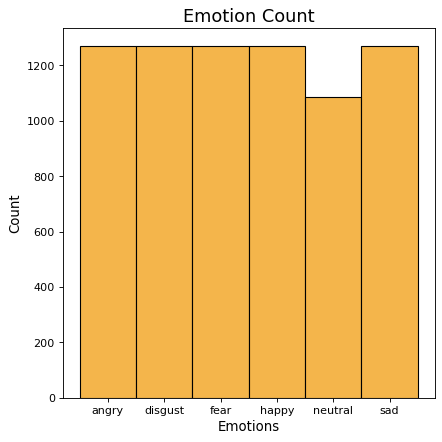

In [8]:
# counting audio categorized by emotions
plt.figure(figsize=(6,6), dpi=80)
plt.title("Emotion Count", size=16)
plt.xlabel('Emotions', size = 12)
plt.ylabel('Count', size = 12)
sns.histplot(dataset.Emotions, color='#F19C0E')
#plt.show()

## Showing spectrogram and waveplot

In [9]:
emotion_sad = dataset[dataset['Emotions']=='sad']['Path']
print(type(emotion_sad))

<class 'pandas.core.series.Series'>


In [10]:
#choosing a file to plot wave and spectogram
#print(emotion_sad.values[65])
data_path = emotion_sad.values[542]
data, sampling_rate = librosa.load(data_path)

### Waveplot

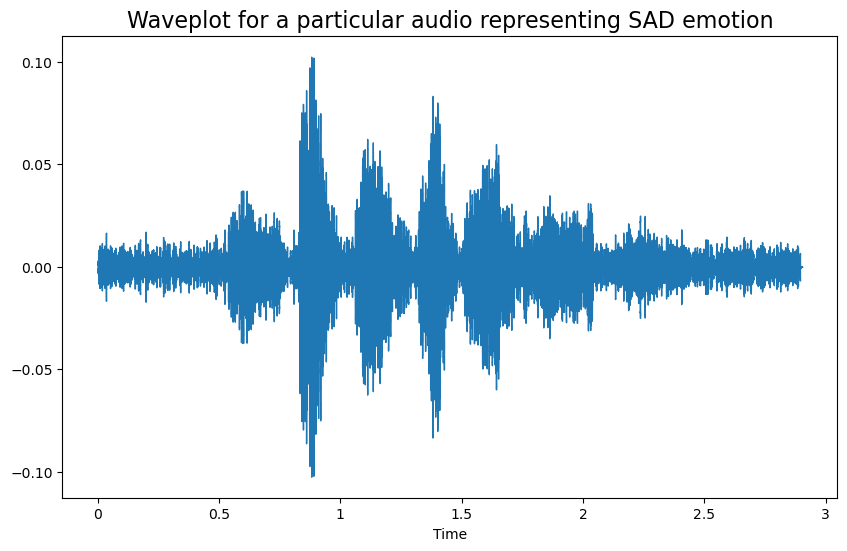

In [11]:
plt.figure(figsize=(10,6))
plt.title("Waveplot for a particular audio representing SAD emotion", size=16)
librosa.display.waveshow(data, sr=sampling_rate)
#plt.show()

### Spectogram

plt.figure(figsize=(10,4))
plt.title("Spectogram for a particular audio representing SAD emotion", size=16)
D = librosa.stft(data)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
librosa.display.specshow(S_db, sr = sampling_rate, x_axis='time', y_axis='hz')
#plt.show()

In [12]:
## Augmentation (Noise Injection)

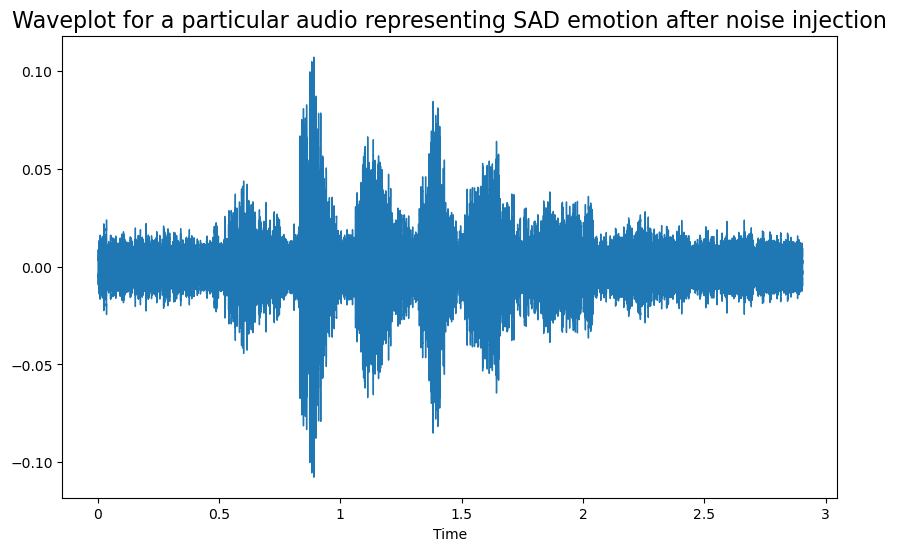

In [13]:
# for audio processing accuracy
# add noise to audio and check how the waveplot changes
# also the observing the change in audio quality

## Augmentation (Noise Injection)
noise_amp = 0.035*np.random.uniform()*np.amax(data)
audio_injected_data = data + noise_amp*np.random.normal(size=data.shape[0])

# waveplot view after noise injection:
plt.figure(figsize=(10,6))
plt.title("Waveplot for a particular audio representing SAD emotion after noise injection", size=16)
librosa.display.waveshow(audio_injected_data, sr=sampling_rate)
# plt.show()

## Feature extraction

### Creating a DF with extracted Feautures

In [ ]:
X, Y = [], []
print("Feature processing...")

for path, emo, index in zip(dataset.Path, dataset.Emotions, range(len(dataset))):
    value, sample = librosa.load(path)
    # noise injection
    noise_amp = 0.035 * np.random.uniform() * np.amax(value)
    value = value + noise_amp * np.random.normal(size=value.shape[0])
    # mfcc
    mfcc = librosa.feature.mfcc(y=value, sr= sample, n_mfcc=13, n_fft=200, hop_length=512)
    mfcc = np.ravel(mfcc.T)
    # mel
    mel = librosa.feature.melspectrogram(y=value, sr=sample, hop_length = 256, n_fft = 512, n_mels=64)
    mel = librosa.power_to_db(mel ** 2)
    mel = np.ravel(mel).T
    result = np.array([])
    result = np.hstack((result, mfcc, mel))
    #print(result)
    result = np.array(result)
    X.append(result)
    Y.append(emo)

Feature processing...


## Without the noise injection process

X, Y = [], []
print("Feature processing...")

for path, emo, index in zip(dataset.Path, dataset.Emotions, range(len(dataset))):
    value, sample = librosa.load(path)
    # mfcc
    mfcc = librosa.feature.mfcc(y=value, sr= sample, n_mfcc=13, n_fft=200, hop_length=512)
    mfcc = np.ravel(mfcc.T)
    # mel
    mel = librosa.feature.melspectrogram(y=value, sr=sample, hop_length = 256, n_fft = 512, n_mels=64)
    mel = librosa.power_to_db(mel ** 2)
    mel = np.ravel(mel).T
    result = np.array([])
    result = np.hstack((result, mfcc, mel))
    #print(result)
    result = np.array(result)
    X.append(result)
    Y.append(emo)

In [14]:
# print(X)
# print(Y)
extracted_audio_df = pd.DataFrame(X)
extracted_audio_df["emotion_of_audio"] = Y
print(extracted_audio_df.shape)
print(extracted_audio_df.tail(10))
extracted_audio_df = extracted_audio_df.fillna(0)
#print(extracted_audio_df.isna().any())

(7442, 30457)
               0          1          2          3          4          5  \
7432 -795.224556  18.147882 -13.755307  21.826403  13.547061   3.394952   
7433 -721.225723 -51.700025   9.707678  20.122560  21.559058  -2.660787   
7434 -732.365846 -49.276242  -1.391164   5.023024  20.083208   4.958756   
7435 -797.582826 -40.257796  -2.391810  16.198576  10.944009   9.508695   
7436 -691.760553 -57.933629  -1.515894  -5.639009  11.656172   1.823470   
7437 -734.164858 -61.354947 -12.843841   6.222145  32.995546  12.839129   
7438 -687.091791 -70.313907 -12.479446  20.694042  20.723145   1.927544   
7439 -676.775985 -81.249188  -0.124715  22.144417   9.581771   1.488780   
7440 -681.346275 -49.991817 -16.378911  12.905776  18.312504  -2.921014   
7441 -720.953087 -80.646041 -20.177964  25.311425  29.478853  -8.907764   

              6          7          8          9  ...  30447  30448  30449  \
7432 -21.150746   0.507344 -12.508761  -0.565724  ...    NaN    NaN    NaN   
7433

## Training

In [15]:
# preparing to train
X = extracted_audio_df.drop(labels='emotion_of_audio', axis= 1)
Y = extracted_audio_df['emotion_of_audio']

x_train, x_test, y_train, y_test = train_test_split(np.array(X), Y, test_size=0.2)

In [16]:
%%time
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

CPU times: total: 2.5 s
Wall time: 2.51 s


## Model creation and fitting

%%time
# solver ="sgd"
mlp_model = MLPClassifier(activation='relu',
                         solver='sgd',
                         hidden_layer_sizes=100,
                         alpha=0.839903176695813,
                         batch_size=150,
                         learning_rate='adaptive',
                         max_iter=100000)
# Fit mlp model
mlp_model.fit(x_train,y_train)
# save the model

In [28]:
y_pred = mlp_model.predict(x_test)
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)

# the accuracy didn't turn out to be that good :(
print("\nModel:{}    Accuracy: {:.2f}%".
          format(type(mlp_model).__name__ , accuracy*100))


Model:MLPClassifier    Accuracy: 40.83%


In [18]:
%%time
# solver = "adam"
# "adam" efers to a stochastic gradient-based optimizer proposed by Kingma, Diederik, and Jimmy Ba
# For a comparison between Adam optimizer and SGD, see Compare Stochastic learning strategies for MLPClassifier.

mlp_model_adam = MLPClassifier(activation='relu',
                         solver='adam',
                         hidden_layer_sizes=100,
                         alpha=0.839903176695813,
                         batch_size=150,
                         learning_rate='adaptive',
                         max_iter=100000)
# Fit mlp model
mlp_model_adam.fit(x_train,y_train)
# save the model

CPU times: total: 23min 58s
Wall time: 4min


MLPClassifier(alpha=0.839903176695813, batch_size=150, hidden_layer_sizes=100,
              learning_rate='adaptive', max_iter=100000)

In [19]:
import pickle
# save the model as a pickle file
model_pkl_file = "D:/2024/Research/25-05-2024/SpeechRecognition/speech_classifier_model_MLP_1.pkl"  

with open(model_pkl_file, 'wb') as file:  
    pickle.dump(mlp_model_adam, file)

In [20]:
file.close()

In [21]:
%%time
# solver = "lbfgs"
# "lbfgs"  is an optimizer in the family of quasi-Newton methods.

mlp_model_lbfgs = MLPClassifier(activation='relu',
                         solver='lbfgs',
                         hidden_layer_sizes=100,
                         alpha=0.839903176695813,
                         batch_size=150,
                         learning_rate='adaptive',
                         max_iter=100000)
# Fit mlp model
mlp_model_lbfgs.fit(x_train,y_train)
# save the model

CPU times: total: 36min 58s
Wall time: 6min 15s


MLPClassifier(alpha=0.839903176695813, batch_size=150, hidden_layer_sizes=100,
              learning_rate='adaptive', max_iter=100000, solver='lbfgs')

In [22]:
import pickle
# save the model as a pickle file
model_pkl_file = "D:/2024/Research/25-05-2024/SpeechRecognition/speech_classifier_model_MLP_2.pkl"  

with open(model_pkl_file, 'wb') as file:  
    pickle.dump(mlp_model_lbfgs, file)

In [23]:
file.close()

## Accuracy calculation

In [24]:
y_pred = mlp_model.predict(x_test)
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)

# the accuracy didn't turn out to be that good :(
print("\nModel:{}    Accuracy: {:.2f}%".
          format(type(mlp_model_adam).__name__ , accuracy*100))


Model:MLPClassifier    Accuracy: 40.83%


## Prediction verification

In [25]:
# the prediction made by the model:
print("The Prediction Made By Model: ")
print("<<<===========================================>>>")
df = pd.DataFrame({'Actual': y_test, 'Predict': y_pred})
print(df.head())

The Prediction Made By Model: 
<<<===========================================>>>
       Actual  Predict
241      fear     fear
3946  disgust    happy
7108    angry    angry
6553     fear      sad
4536      sad  neutral


In [26]:
y_pred = mlp_model.predict(x_test)
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)

# the accuracy didn't turn out to be that good :(
print("\nModel:{}    Accuracy: {:.2f}%".
          format(type(mlp_model_lbfgs).__name__ , accuracy*100))


Model:MLPClassifier    Accuracy: 40.83%


In [27]:
# the prediction made by the model:
print("The Prediction Made By Model: ")
print("<<<===========================================>>>")
df = pd.DataFrame({'Actual': y_test, 'Predict': y_pred})
print(df.head())

The Prediction Made By Model: 
<<<===========================================>>>
       Actual  Predict
241      fear     fear
3946  disgust    happy
7108    angry    angry
6553     fear      sad
4536      sad  neutral
